# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [22]:
# Функция для построения сводных таблиц
def pivot_func(column):
    # создание сводной таблицы
    data_pivot = data.pivot_table(
        index=column,
        values="debt",
        aggfunc=("count", "sum", "mean")
    )
    # переименование столбцов
    data_pivot = data_pivot.rename(columns={
        "count" : "Всего кредитополучателей",
        "sum" : 'Всего должников',
        "mean" : 'Доля должников'
    })
    
    print(data_pivot)

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
# Применяем полученную функцию к столбцу "children" с информацией о количестве детей в семье кредитополучателя
pivot_func("children")

          Всего кредитополучателей  Доля должников  Всего должников
children                                                           
0                          14091.0        0.075438           1063.0
1                           4808.0        0.092346            444.0
2                           2052.0        0.094542            194.0
3                            330.0        0.081818             27.0
4                             41.0        0.097561              4.0
5                              9.0        0.000000              0.0


<BarContainer object of 3 artists>

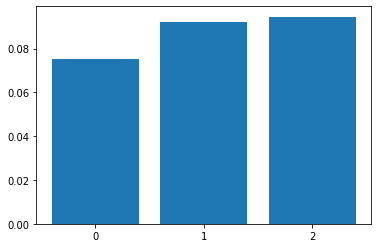

In [25]:
# Построим столбчатую диаграмму зависимости доли должников от количества детей для групп 0, 1, 2 ребенка в семье
fam_debt_part = data.groupby("children")["debt"].sum() / data.groupby("children")["debt"].count()
fam_debt_part = fam_debt_part[0:3].tolist()
children = ["0", "1", "2"]

plt.bar(children, fam_debt_part)

**Вывод:** Данных по кредитополучателям с 3 и более детьми слишком мало. Рассматривая группы с 0, 1, 2 детьми можно сделать вывод, что чем меньше количество детей, тем ниже доля должников среди таких клиентов.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [26]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
pivot_func("family_status")

                       Всего кредитополучателей  Доля должников  \
family_status                                                     
Не женат / не замужем                    2796.0        0.097639   
в разводе                                1189.0        0.070648   
вдовец / вдова                            951.0        0.066246   
гражданский брак                         4134.0        0.093130   
женат / замужем                         12261.0        0.075606   

                       Всего должников  
family_status                           
Не женат / не замужем            273.0  
в разводе                         84.0  
вдовец / вдова                    63.0  
гражданский брак                 385.0  
женат / замужем                  927.0  


<BarContainer object of 5 artists>

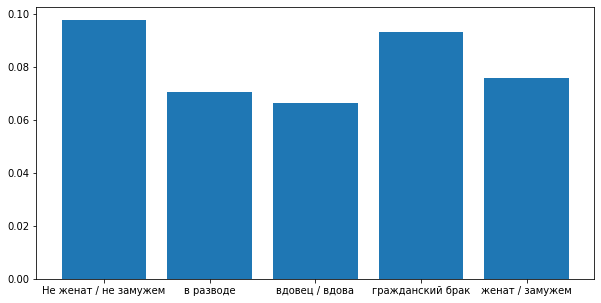

In [27]:
#Построим столбчатую диаграмму зависимости доли должников от семейного положения
debt_part = data.groupby("family_status")["debt"].sum() / data.groupby("family_status")["debt"].count().tolist()
family_status = debt_part.index.tolist()

fig = plt.figure(figsize = (10, 5))
plt.bar(family_status, debt_part)

In [28]:
# Проверим связь семейного положения со средним возрастом
# создание сводной таблицы
fam_pivot = data.pivot_table(
    index="family_status",
    values=["dob_years", "debt"],
    aggfunc="mean"
)
print(fam_pivot)

                           debt  dob_years
family_status                             
Не женат / не замужем  0.097639  38.368026
в разводе              0.070648  45.561817
вдовец / вдова         0.066246  56.501577
гражданский брак       0.093130  42.067731
женат / замужем        0.075606  43.558519


**Вывод:** Меньше всего доля должников среди кредитополучателей, побывавших в официальном браке. Как видно из таблицы выше группы "вдовец/вдова" и "в разводе" обладают наибольшим значением среднего возраста. Этим также может быть обусловлено отсутствие задолженностей в данных категориях

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<span style="color:green">Воспользуемся результатами категоризации по уровню дохода, которую проводили ранее</span>

In [29]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
pivot_func("total_income_category")

                       Всего кредитополучателей  Доля должников  \
total_income_category                                             
A                                          25.0        0.080000   
B                                        5014.0        0.070602   
C                                       15921.0        0.084982   
D                                         349.0        0.060172   
E                                          22.0        0.090909   

                       Всего должников  
total_income_category                   
A                                  2.0  
B                                354.0  
C                               1353.0  
D                                 21.0  
E                                  2.0  


<BarContainer object of 2 artists>

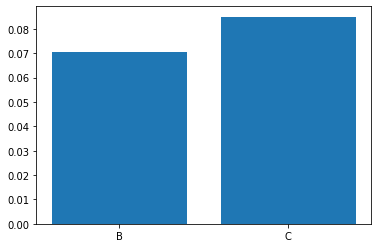

In [30]:
# Проанализируем данные по двум самым большим категориям кредитополучателей, построив график
income_debt_part = data.groupby("total_income_category")["debt"].sum() / data.groupby("total_income_category")["debt"].count()
income_debt_part = income_debt_part["B":"C"].tolist()
income_cats = ["B", "C"]

plt.bar(income_cats, income_debt_part)

**Вывод:** По данным двух самых больших категорий кредитополучателей, можно сделать вывод, что с увеличением уровня дохода доля задолженностей падает

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
# Используем функцию для создания сводной таблицы
pivot_func("purpose_category")

                          Всего кредитополучателей  Доля должников  \
purpose_category                                                     
операции с автомобилем                      4279.0        0.093480   
операции с недвижимостью                   10751.0        0.072551   
получение образования                       3988.0        0.092528   
проведение свадьбы                          2313.0        0.079118   

                          Всего должников  
purpose_category                           
операции с автомобилем              400.0  
операции с недвижимостью            780.0  
получение образования               369.0  
проведение свадьбы                  183.0  


Статус ['операции с недвижимостью', 'операции с автомобилем', 'получение образования', 'проведение свадьбы']
Должники [780, 400, 369, 183]
Доля должников [0.073, 0.093, 0.093, 0.079]


<BarContainer object of 4 artists>

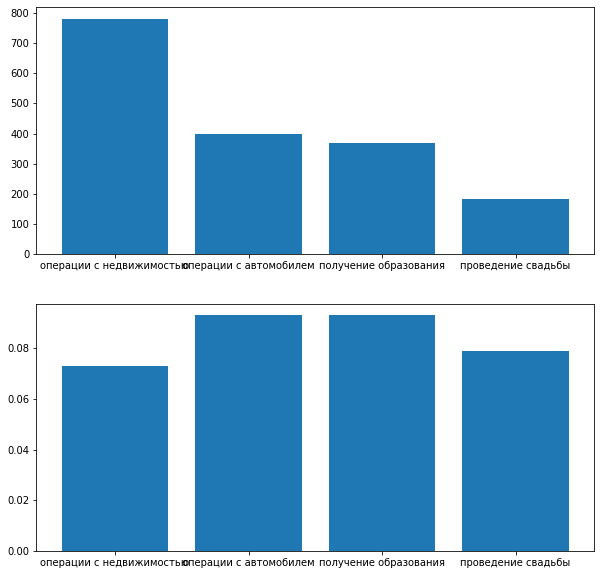

In [32]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
# Определим возможные значения семейного положения и наличия задолженностей
purpose = data["purpose_category"].unique().tolist()
#Определим долю количество и долю должников в каждой группе
purpose_debt_count = []
purpose_debt_part = []
for p in purpose:
    debt_sum = data.loc[(data["purpose_category"] == p) & (data["debt"] == 1), "debt"].sum()
    group_count = data.loc[(data["purpose_category"] == p), "debt"].count()
    purpose_debt_count.append(debt_sum)
    purpose_debt_part.append(round(debt_sum / group_count, 3))

# Проверка значений
print("Статус", purpose)
print("Должники", purpose_debt_count)
print("Доля должников", purpose_debt_part)
    
# Построим график зависимости
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax[0].bar(purpose, purpose_debt_count)
ax[1].bar(purpose, purpose_debt_part)

**Вывод:** Доля должников ниже всего в группах с целями кредитования: "операции с недвижимостью", "проведение свадьбы", больше всего доля должников в группах с целью "операции с автомобилем" и "получение образования"

In [33]:
# Проверим связь цели кредитования с другими характеристиками заемщика
# создание сводной таблицы
purp_pivot = data.pivot_table(
    index="purpose_category",
    values=["children", "dob_years", "days_employed", "education_id", "total_income", "debt"],
    aggfunc="mean"
)
print(purp_pivot)

                          children  days_employed      debt  dob_years  \
purpose_category                                                         
операции с автомобилем    0.465296   69379.128539  0.093480  43.503622   
операции с недвижимостью  0.477444   65816.592502  0.072551  43.168915   
получение образования     0.479438   67700.030397  0.092528  43.415496   
проведение свадьбы        0.464764   68266.116011  0.079118  43.130134   

                          education_id   total_income  
purpose_category                                       
операции с автомобилем        0.820051  165162.536808  
операции с недвижимостью      0.815273  166752.070598  
получение образования         0.828485  162621.224423  
проведение свадьбы            0.799395  163817.838738  


#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* В исходых данных пропущены значения, связанные с трудовым стажем и ежемесячным доходом этих значений одинаковое количество в обоих столбцах. Возможные причины:

* Технический сбой у конкретных пользователей повлиял на заполенение данных, связанных с трудовой деятельностью (поэтому данные пропущены сразу в обоих столбцах, проверка в ячейке ниже)
* Человеческий фактор: клиенты не предоставили информацию, заполнили некорректно

In [34]:
# Проверка совпадения объемов потерянных значений в столбцах со значениями уровня дохода и трудового стажа
raw_data = pd.read_csv("/datasets/data.csv")
len(raw_data.loc[(raw_data['days_employed'].isna()) & (raw_data['total_income'].isna())])

2174

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* Пропущенные значения были обнаружены в столбцах с количественными переменными, значения которых можно сравнивать между собой. Следовательно, можно использовать какое-то число для замены. Затем была проведена категоризация данных, мы получили информацию о доходах и стаже заемщиков, которые относятся к тем же категориям, что и заемщики с пропущенными данными. Значения внутри одной категории близки друг к другу. Однако, чтобы учесть возможные выбросы, вместо среднего значения для заполнения пропусков стоит взять медианное значение.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

**1. Предобработка данных:**

Пропуски в данных по значениям трудового стажа и уровня дохода были заполнены медианными значениями по категориям кредитополучателей. Обработаны аномальные значения количества детей и трудового стажа. Удалены дубликаты. Проведена категоризация данных по уровню дохода и цели оформления кредита.

**2. Выявленные зависимости:**

2.1. Обнаружена зависимость наличия задолженности от количества детей: чес больше детей у кредитополучателя, тем выше риск задолженности

2.2. Обнаружена зависимость между семейным положением и наличием задолженности: кредитополучатели из категорий "вдовец/вдова" и "в разводе" реже имеют задолженности. Это также связано с возрастом кредитополучателя, чем выше возраст, тем ниже доля задолженностей.

2.3. Обнаружена зависимость между уровнем дохода и наличием задолженности. Чем выше доход, тем менее вероятно возникновение задолженности.

2.4. Обнаружена зависимость между целью кредитования и наличием задолженности. Меньше всего задолженностей по целям "операции с недвижимостью" и "проведение свадьбы", больше всего среди целей "операции с автомобилем", "получение образования"


**3. Портреты надежного и рискованного заемщика:**

3.1. Надежный заемщик: 0 детей, высокий уровень дохода, прошедший официальный брак, цель: операции с недвижимостью/проведение свадьбы
3.2. Рискованный заемщик: 3 и более детей,  низкий уровень дохода, не прошедший официальный брак, цель: операции с автомобилем/получение образования

**4. Рекомендации заказчику:**

На этапе предобработки данных, обнаружено, что произошла потеря данных в столбцах "total_income" и "days_employed". Возможно, произошел технический сбой, так как у одних и тех же кредитополучателей данные были не заполнены сразу в двух этих столбцах
